## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

## Insert Data

In [2]:
df = pd.read_csv("360_inj_cyc_e114_deneme.csv")

In [3]:
df.head()

,Unnamed: 0,date,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,...,sfc,frcClamp,timPlasticisation1,timPlasticisation2,reason,prsInjectionHyd1,prsTransferHyd1,strCushion1,strPlasticisation1,strTransfer1
0,23348,2021-01-13T16:25:16.000,235.0,44.02,230.3,254.8,229.9,250.1,255.0,235.1,...,[],7925.7,5.84,24.18,[],NaN,NaN,NaN,NaN,NaN
1,31123,2021-02-25T08:02:22.000,224.9,37.44,238.3,264.5,237.9,250.6,265.0,248.0,...,[],7149.7,7.31,33.39,[],NaN,NaN,NaN,NaN,NaN
2,31124,2021-02-25T07:55:47.000,225.0,37.44,238.2,264.5,238.0,249.4,265.0,248.0,...,[],7147.9,7.38,32.96,[],NaN,NaN,NaN,NaN,NaN
3,31125,2021-02-25T07:53:09.000,225.0,37.44,238.2,264.5,238.0,249.8,265.0,248.0,...,[],7142.5,7.34,32.80,[],NaN,NaN,NaN,NaN,NaN
4,31126,2021-02-25T07:58:24.000,225.0,37.44,238.3,264.5,237.9,251.1,265.0,248.1,...,[],7191.0,7.35,32.92,[],NaN,NaN,NaN,NaN,NaN


In [4]:
len(df)

46698

## Convert reason(injection defect) data to 0(OK) and 1 (NOK)

In [5]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1
df = df.astype({"reason": int})

In [6]:
df.columns

Index(['Unnamed: 0', 'date', 'tmpMoldZone25', 'timCool1', 'tmpBarrel2Zone3',
       'tmpMoldZone3', 'tmpBarrel2Zone4', 'tmpFlange1', 'tmpMoldZone4',
       'tmpBarrel2Zone1', 'tmpFlange2', 'tmpMoldZone1', 'volCushion1',
       'tmpBarrel2Zone2', 'tmpMoldZone2', 'volCushion2', 'prsBackSpec2',
       'prsBackSpec1', 'spdInjection1', 'tmpMoldZone9', 'spdInjection2',
       'tmpMoldZone7', 'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5',
       'tmpMoldZone6', 'tmpMoldZone19', 'cntCycle', 'tmpMoldZone18',
       'volTransfer2', 'stsMachine', 'tmpMoldZone15', 'volTransfer1',
       'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16', 'timTransfer2',
       'timTransfer1', 'velPlasticisation2', 'velPlasticisation1',
       'timMoldClose', 'tmpBarrel1Zone5', 'tmpMoldZone22', 'tmpBarrel1Zone4',
       'tmpMoldZone21', 'tmpMoldZone24', 'tmpBarrel1Zone6', 'tmpMoldZone23',
       'prsPomp1', 'tmpBarrel1Zone1', 'prsPomp2', 'tmpBarrel1Zone3',
       'tmpMoldZone20', 'tmpBarrel1Zone2', 'volShot1', 'volPlasti

## Check null data

<AxesSubplot:>

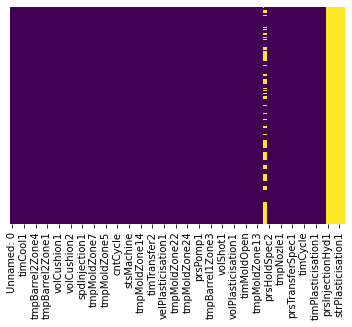

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold','prsInjectionHyd1','prsTransferHyd1','strCushion1','strPlasticisation1','strTransfer1']

In [9]:
df = df.drop(drop_list, axis=1)

<AxesSubplot:>

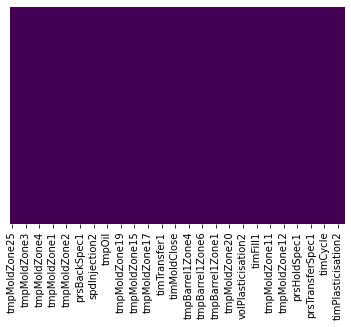

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.dtypes

tmpMoldZone25         float64
timCool1              float64
tmpBarrel2Zone3       float64
tmpMoldZone3          float64
tmpBarrel2Zone4       float64
                       ...   
timCycle              float64
frcClamp              float64
timPlasticisation1    float64
timPlasticisation2    float64
reason                  int32
Length: 74, dtype: object

In [12]:
df['reason'].value_counts()

0    39645
1     7053
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

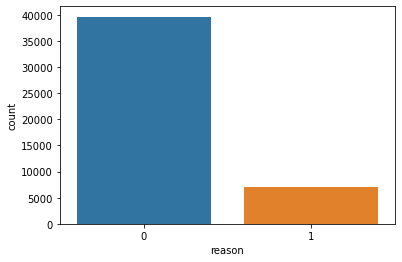

In [13]:
sns.countplot(x='reason',data=df)

In [14]:
df.to_csv("Without reason/injection_data_v4.csv")

<AxesSubplot:>

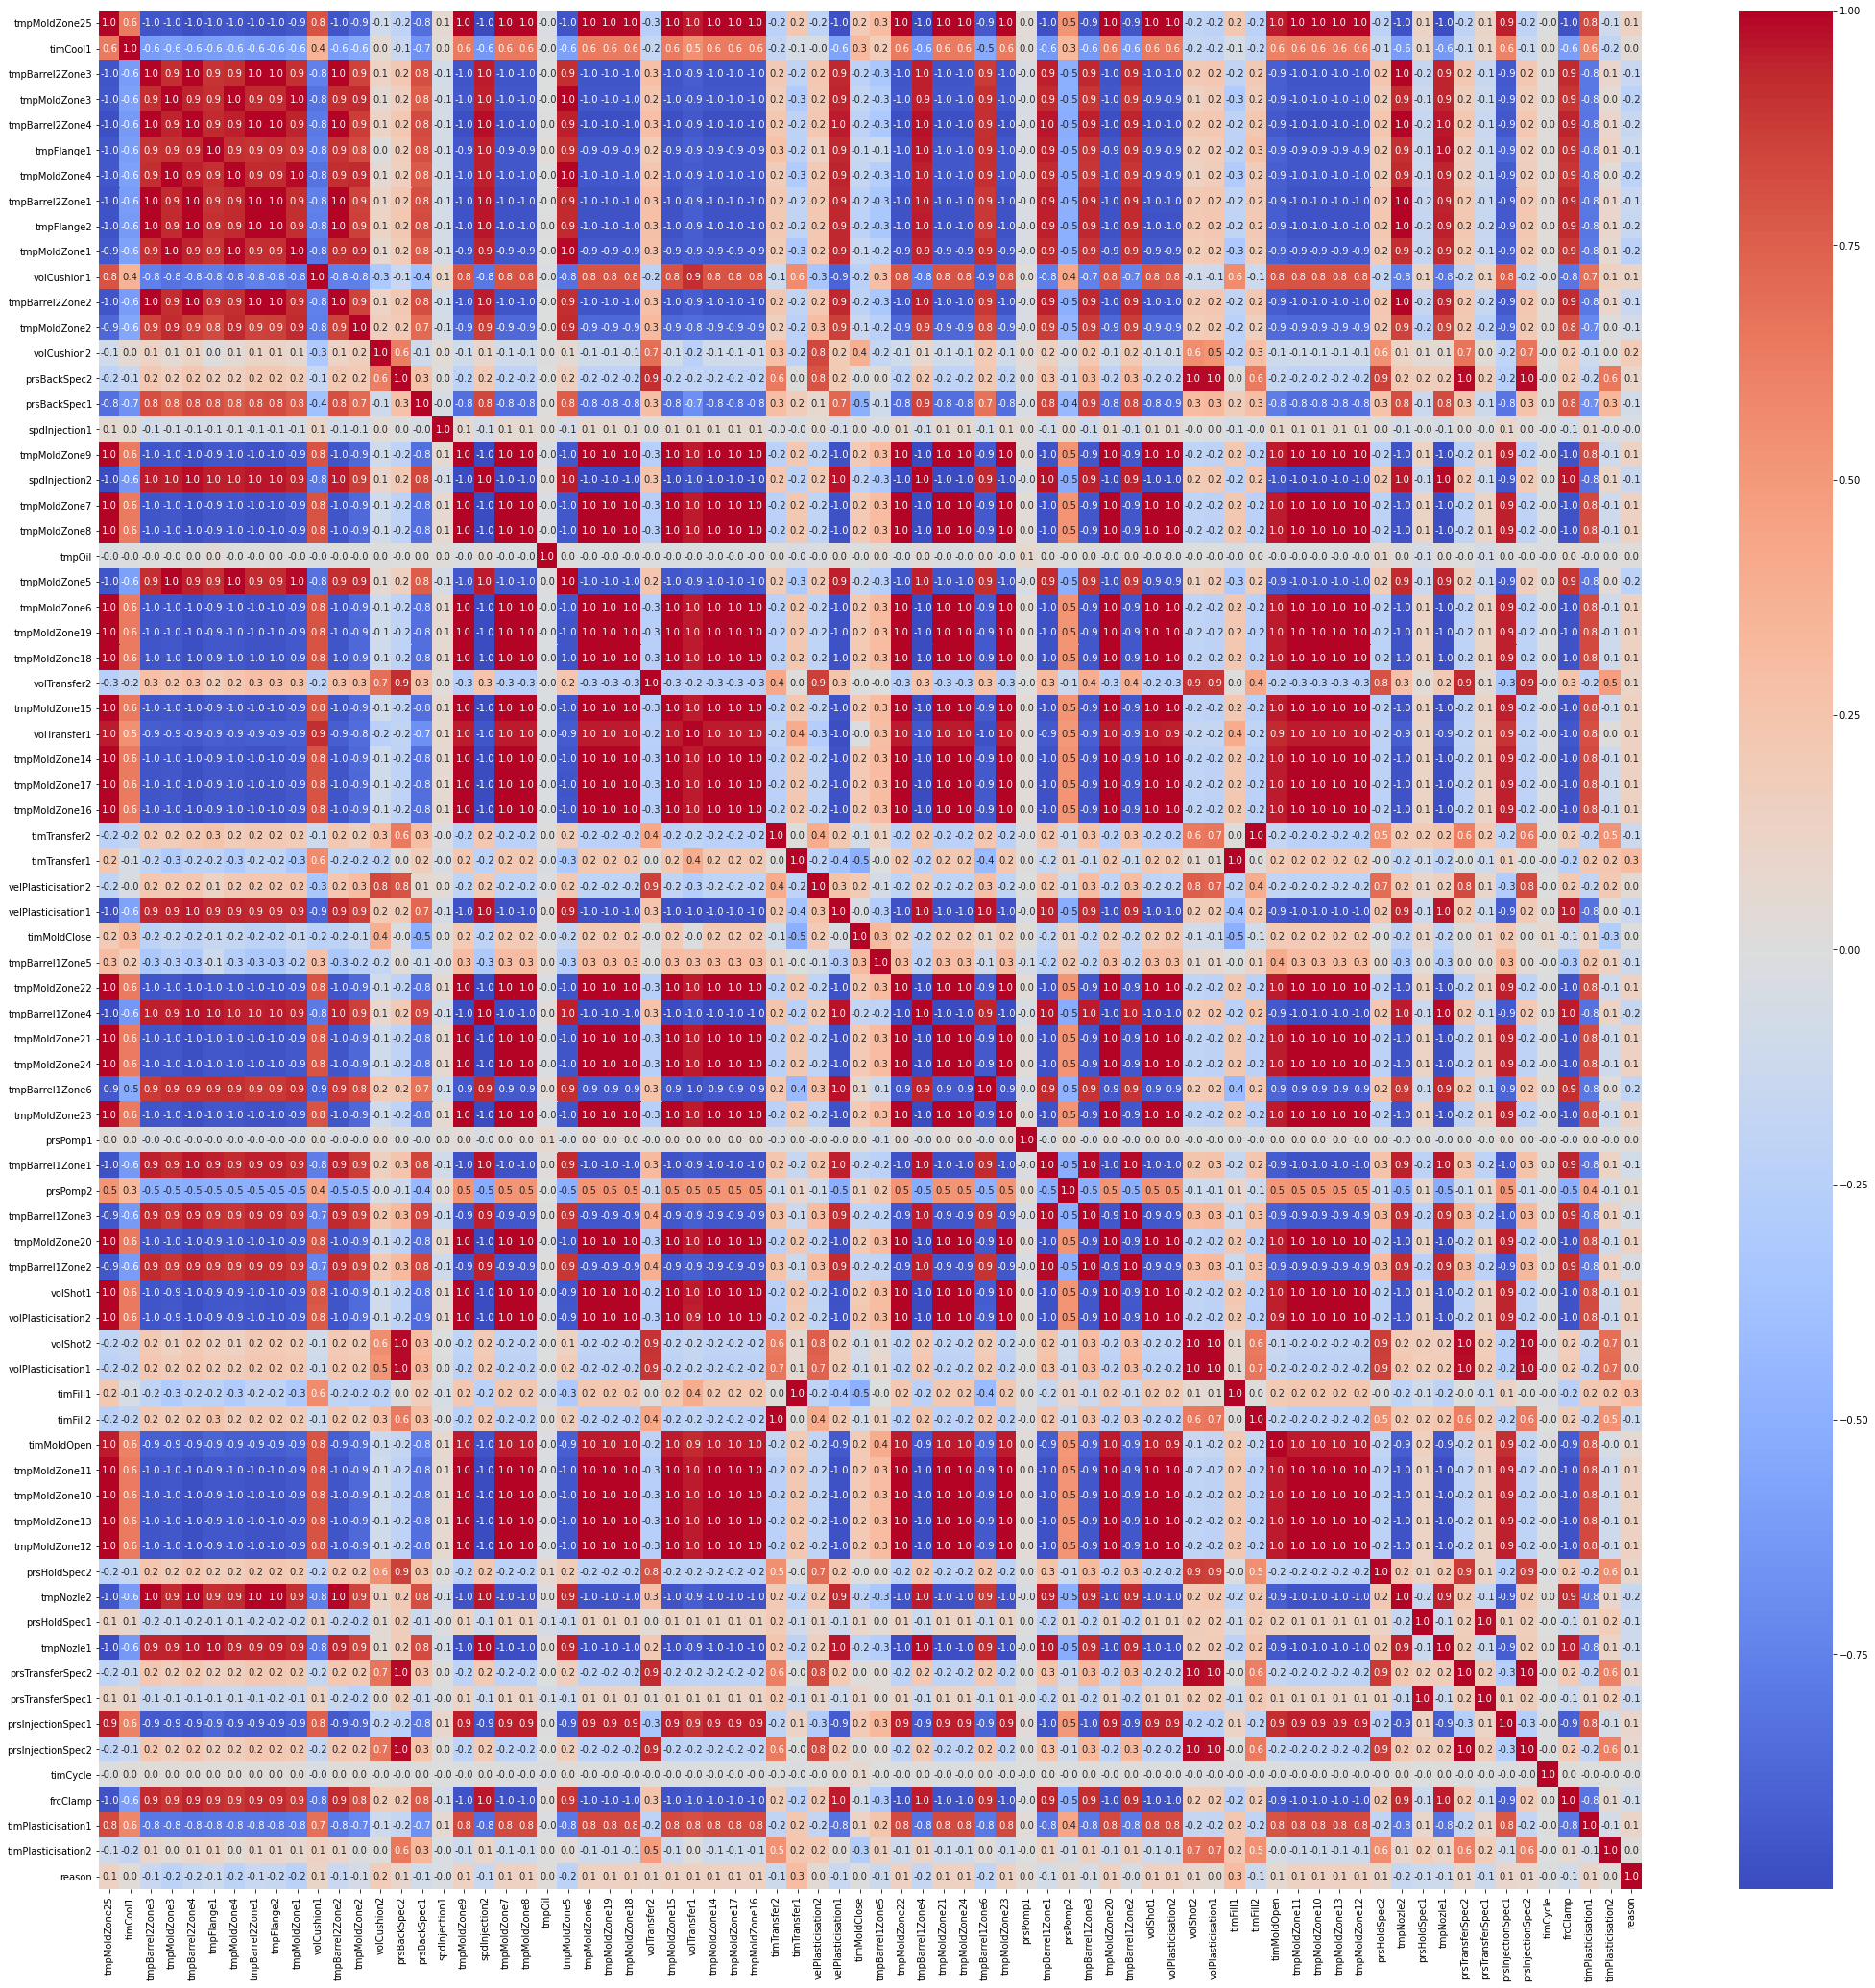

In [15]:
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [15]:
df.columns

Index(['tmpMoldZone25', 'timCool1', 'tmpBarrel2Zone3', 'tmpMoldZone3',
       'tmpBarrel2Zone4', 'tmpFlange1', 'tmpMoldZone4', 'tmpBarrel2Zone1',
       'tmpFlange2', 'tmpMoldZone1', 'volCushion1', 'tmpBarrel2Zone2',
       'tmpMoldZone2', 'volCushion2', 'prsBackSpec2', 'prsBackSpec1',
       'spdInjection1', 'tmpMoldZone9', 'spdInjection2', 'tmpMoldZone7',
       'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5', 'tmpMoldZone6',
       'tmpMoldZone19', 'tmpMoldZone18', 'volTransfer2', 'tmpMoldZone15',
       'volTransfer1', 'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16',
       'timTransfer2', 'timTransfer1', 'velPlasticisation2',
       'velPlasticisation1', 'timMoldClose', 'tmpBarrel1Zone5',
       'tmpMoldZone22', 'tmpBarrel1Zone4', 'tmpMoldZone21', 'tmpMoldZone24',
       'tmpBarrel1Zone6', 'tmpMoldZone23', 'prsPomp1', 'tmpBarrel1Zone1',
       'prsPomp2', 'tmpBarrel1Zone3', 'tmpMoldZone20', 'tmpBarrel1Zone2',
       'volShot1', 'volPlasticisation2', 'volShot2', 'volPlasticisation1',
  

In [16]:
df.timPlasticisation1

0         5.84
1         7.31
2         7.38
3         7.34
4         7.35
         ...  
46693    22.67
46694    22.75
46695    23.08
46696    23.14
46697    20.83
Name: timPlasticisation1, Length: 46698, dtype: float64

In [17]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

## Prepare validation data

In [18]:
df_test = pd.concat([df_class_0[:500] , df_class_1[:500]], join="inner")
df_train = pd.concat([df_class_0[500:] , df_class_1[500:]], join="inner")

<AxesSubplot:xlabel='reason', ylabel='count'>

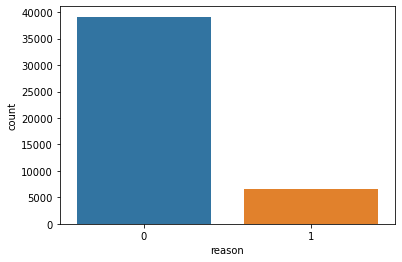

In [19]:
sns.countplot(x='reason',data=df_train)

<AxesSubplot:xlabel='reason', ylabel='count'>

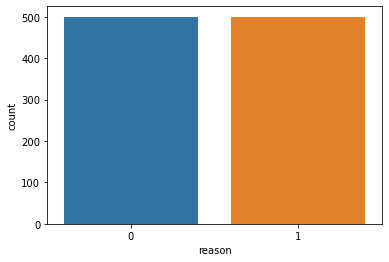

In [20]:
sns.countplot(x='reason',data=df_test)

In [21]:
y = df_train['reason']
X = df_train.drop(['reason'], axis=1)

## Normalization

In [22]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.926921,-0.312413,0.873177,1.168435,0.917647,0.992046,1.157464,0.898917,0.905311,1.171981,...,-1.377514,0.941073,0.202085,-1.286325,-1.581955,0.201371,-0.014806,1.081572,-0.868446,-0.565946
1,-0.926921,-0.312413,0.874280,1.168435,0.917647,0.898069,1.157464,0.898917,0.896801,1.171981,...,-1.407773,1.007964,0.194609,-1.304525,-1.592650,0.203961,-0.013951,1.087098,-0.868446,-0.563646
2,-0.926855,-0.312413,0.874280,1.168435,0.917647,0.795550,1.157464,0.898917,0.904247,1.167298,...,-1.350093,0.869037,0.202373,-1.321814,-1.602811,0.204249,-0.014578,1.079362,-0.866407,-0.556746
3,-0.926921,-0.312413,0.874280,1.163858,0.917647,1.026219,1.157464,0.899990,0.899992,1.171981,...,-1.340637,0.894764,0.210713,-1.286325,-1.581955,0.211444,-0.014578,1.074328,-0.868446,-0.555596
4,-0.926921,-0.313643,0.873177,1.168435,0.918744,0.812636,1.157464,0.898917,0.892546,1.171981,...,-1.452215,1.013109,0.202373,-1.283595,-1.580350,0.205688,-0.012353,1.078134,-0.864367,-0.563646


## Prepare train and test data

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [25]:
np.any(np.isnan(X_train))

True

In [30]:
X_train = X_train.fillna(X_train.mean())

## Logistic Regression

Confusion Matrix:
 [[7735   77]
 [ 211 1117]]
Accuracy:
 0.9684901531728666
Precision:
 0.9355108877721943
Recall:
 0.8411144578313253
AUC:
 0.9852935166163888


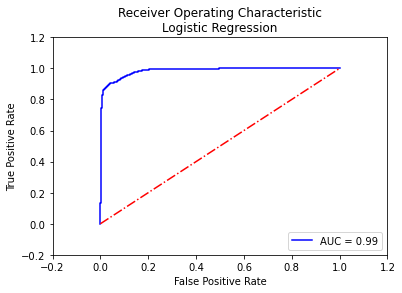

In [31]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test and Evaluation

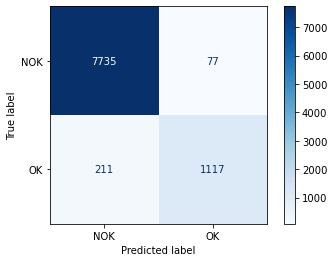

In [32]:
cm = metrics.confusion_matrix(y_val,y_logreg)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [33]:
y_test = df_test['reason']
X_test = df_test.drop(['reason'], axis=1)

In [34]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.930811,-0.189433,0.875383,0.889237,0.916551,0.829723,0.884434,0.846384,0.845741,0.891029,...,0.014373,0.905055,0.193458,0.063185,-0.788896,0.190722,-0.005165,1.068741,-0.870486,-0.488894
1,-0.937469,-0.998646,0.963639,1.333208,1.004290,0.872439,1.339483,0.984686,0.988283,1.326504,...,-0.571884,0.961655,0.175054,-0.430028,-1.078739,0.165106,-0.044929,0.592337,-0.720562,0.570289
2,-0.937403,-0.998646,0.962536,1.333208,1.005387,0.769920,1.339483,0.984686,0.993602,1.331187,...,-0.356293,1.116018,0.170165,-0.427298,-1.077135,0.164243,-0.039737,0.591232,-0.713423,0.520838
3,-0.937403,-0.998646,0.962536,1.333208,1.005387,0.804093,1.339483,0.984686,0.977645,1.326504,...,-0.360075,0.863892,0.168440,-0.431848,-1.079809,0.167121,-0.039737,0.587917,-0.717503,0.502437
4,-0.937403,-0.998646,0.963639,1.333208,1.004290,0.915156,1.339483,0.985758,0.984028,1.326504,...,-0.468816,0.858746,0.173041,-0.426388,-1.076600,0.163667,-0.039966,0.617692,-0.716483,0.516238


Confusion Matrix:
 [[500   0]
 [ 82 418]]
Accuracy:
 0.918
Precision:
 1.0
Recall:
 0.836
AUC:
 0.99836


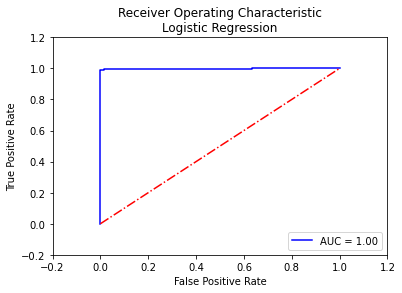

In [35]:
y_logreg_val=logreg.predict(X_test)
y_logreg_prob_val=logreg.predict_proba(X_test)[:,1]
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_logreg_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_logreg_val))
print("Precision:\n",metrics.precision_score(y_test,y_logreg_val))
print("Recall:\n",metrics.recall_score(y_test,y_logreg_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_logreg_prob_val))
auc=metrics.roc_auc_score(y_test,y_logreg_prob_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_logreg_prob_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

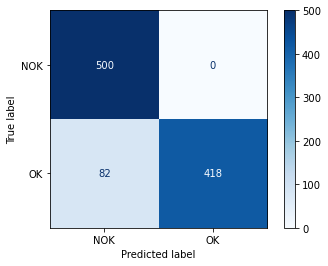

In [36]:
cm = metrics.confusion_matrix(y_test,y_logreg_val)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

## Hyper-parameter tuning

In [37]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [38]:
grid_log_reg = GridSearchCV(logreg, log_reg_params)

In [39]:
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

Confusion Matrix:
 [[7739   73]
 [ 182 1146]]
Accuracy:
 0.9721006564551422
Precision:
 0.9401148482362592
Recall:
 0.8629518072289156
AUC:
 0.9861167018303629


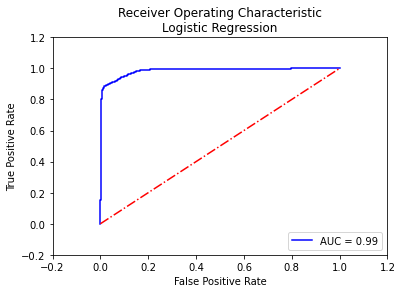

In [40]:
tuned_log = grid_log_reg.predict(X_val)
tuned_log_prob = grid_log_reg.predict_proba(X_val)[:,1]
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,tuned_log))
print("Accuracy:\n",metrics.accuracy_score(y_val,tuned_log))
print("Precision:\n",metrics.precision_score(y_val,tuned_log))
print("Recall:\n",metrics.recall_score(y_val,tuned_log))
print("AUC:\n",metrics.roc_auc_score(y_val,tuned_log_prob))
auc=metrics.roc_auc_score(y_val,tuned_log_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,tuned_log_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix:
 [[500   0]
 [ 68 432]]
Accuracy:
 0.932
Precision:
 1.0
Recall:
 0.864
AUC:
 0.998064


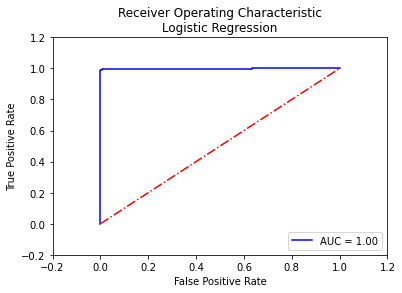

In [41]:
tuned_log_val = grid_log_reg.predict(X_test)
tuned_log_prob_val = grid_log_reg.predict_proba(X_test)[:,1]
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,tuned_log_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,tuned_log_val))
print("Precision:\n",metrics.precision_score(y_test,tuned_log_val))
print("Recall:\n",metrics.recall_score(y_test,tuned_log_val))
print("AUC:\n",metrics.roc_auc_score(y_test,tuned_log_prob_val))
auc=metrics.roc_auc_score(y_test,tuned_log_prob_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,tuned_log_prob_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

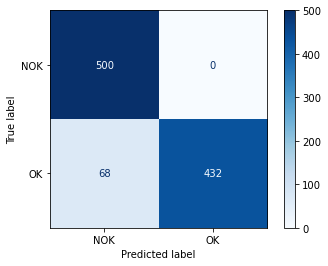

In [42]:
cm = metrics.confusion_matrix(y_test,tuned_log_val)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

## Random Forest Classification

Confusion Matrix:
 [[7803    9]
 [ 137 1191]]
Accuracy:
 0.9840262582056892
Precision:
 0.9925
Recall:
 0.8968373493975904
AUC:
 0.9958938576888199


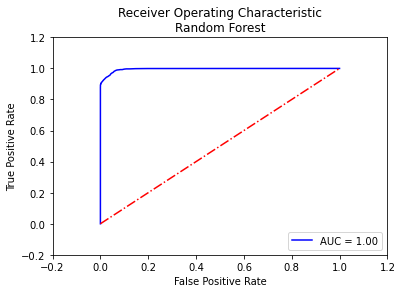

In [43]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test and Validation

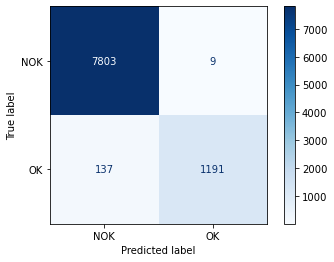

In [44]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[500   0]
 [ 51 449]]
Accuracy:
 0.949
Precision:
 1.0
Recall:
 0.898
AUC:
 1.0


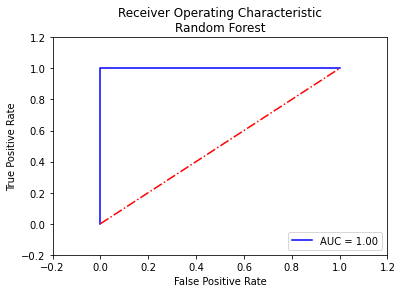

In [45]:
y_rf2_val=rf2.predict(X_test)
y_rf_prob2_val=rf2.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf2_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf2_val))
print("Precision:\n",metrics.precision_score(y_test,y_rf2_val))
print("Recall:\n",metrics.recall_score(y_test,y_rf2_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob2_val))
auc=metrics.roc_auc_score(y_test,y_rf_prob2_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob2_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

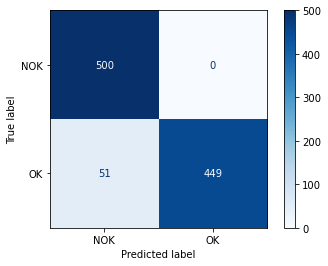

In [46]:
cm = metrics.confusion_matrix(y_test,y_rf2_val)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[500   0]
 [  0 500]]
Accuracy:
 1.0
Precision:
 1.0
Recall:
 1.0
AUC:
 1.0


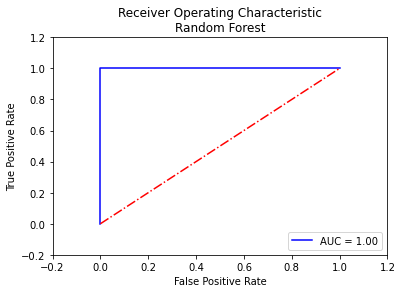

In [53]:
threshold = 0.1
y_rf_prob2_val = rf2.predict_proba(X_test)[:,1]
prob_thresh = (y_rf_prob2_val>=threshold).astype('int')
CM_2_Thresh = confusion_matrix(y_test,prob_thresh)
print("Confusion Matrix:\n", CM_2_Thresh)
print("Accuracy:\n",metrics.accuracy_score(y_test,prob_thresh))
print("Precision:\n",metrics.precision_score(y_test,prob_thresh))
print("Recall:\n",metrics.recall_score(y_test,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_test,prob_thresh))

auc=metrics.roc_auc_score(y_test,prob_thresh)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,prob_thresh)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

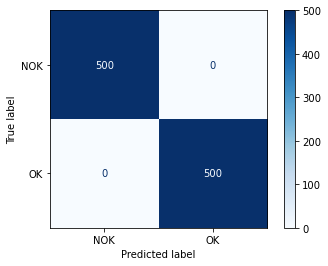

In [55]:
cm = metrics.confusion_matrix(y_test,prob_thresh)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[7805    7]
 [ 135 1193]]
Accuracy:
 0.9844638949671772
Precision:
 0.9941666666666666
Recall:
 0.8983433734939759
AUC:
 0.9959662960598152


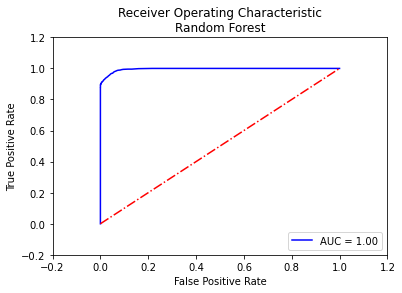

In [56]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

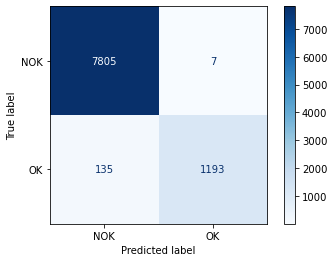

In [57]:
cm = metrics.confusion_matrix(y_val,y_rf)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[500   0]
 [ 59 441]]
Accuracy:
 0.941
Precision:
 1.0
Recall:
 0.882
AUC:
 1.0


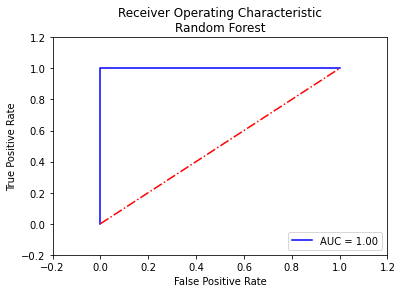

In [58]:
y_rf_val=rf.predict(X_test)
y_rf_prob_val=rf.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf_val))
print("Precision:\n",metrics.precision_score(y_test,y_rf_val))
print("Recall:\n",metrics.recall_score(y_test,y_rf_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob_val))
auc=metrics.roc_auc_score(y_test,y_rf_prob_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
threshold = 0.05
y_rf_prob_val = rf.predict_proba(X_test)[:,1]
prob_thresh = (y_rf_prob_val>=threshold).astype('int')
CM_2_Thresh = confusion_matrix(y_test,prob_thresh)
print("Confusion Matrix:\n", CM_2_Thresh)
print("Accuracy:\n",metrics.accuracy_score(y_test,prob_thresh))
print("Precision:\n",metrics.precision_score(y_test,prob_thresh))
print("Recall:\n",metrics.recall_score(y_test,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_test,prob_thresh))

Confusion Matrix:
 [[500   0]
 [  0 500]]
Accuracy:
 1.0
Precision:
 1.0
Recall:
 1.0
AUC:
 1.0


Confusion Matrix:
 [[7761   51]
 [ 149 1179]]
Accuracy:
 0.9781181619256017
Precision:
 0.9585365853658536
Recall:
 0.8878012048192772
AUC:
 0.9750066413889044


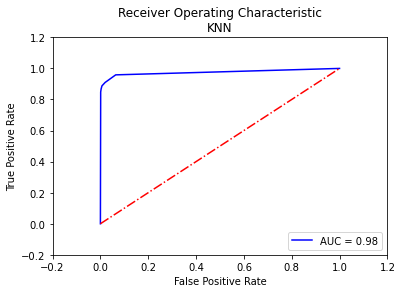

In [60]:
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_knc=knc.predict(X_val)
y_knc_prob2=knc.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_knc))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_knc))
print("Precision:\n",metrics.precision_score(y_val,y_knc))
print("Recall:\n",metrics.recall_score(y_val,y_knc))
print("AUC:\n",metrics.roc_auc_score(y_val,y_knc_prob2))
auc=metrics.roc_auc_score(y_val,y_knc_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_knc_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nKNN')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

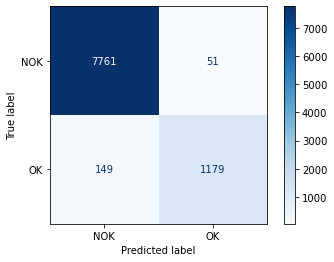

In [61]:
cm = metrics.confusion_matrix(y_val,y_knc)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[500   0]
 [ 62 438]]
Accuracy:
 0.938
Precision:
 1.0
Recall:
 0.876
AUC:
 0.9787659999999999


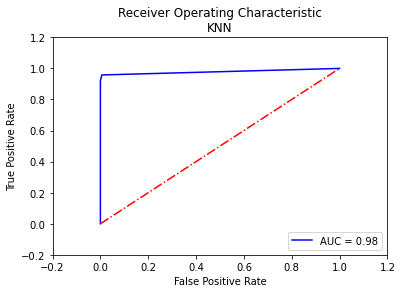

In [62]:
y_knc_val=knc.predict(X_test)
y_knc_prob2_val=knc.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_knc_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_knc_val))
print("Precision:\n",metrics.precision_score(y_test,y_knc_val))
print("Recall:\n",metrics.recall_score(y_test,y_knc_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_knc_prob2_val))
auc=metrics.roc_auc_score(y_test,y_knc_prob2_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_knc_prob2_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nKNN')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

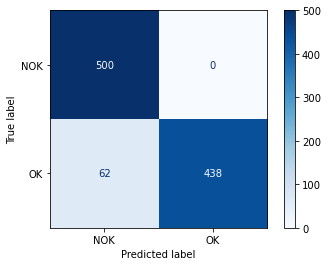

In [63]:
cm = metrics.confusion_matrix(y_test,y_knc_val)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)